In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#connect to DB
conn = sqlite3.connect('datawarehouse.db')
cursor = conn.cursor()
print("Opened database successfully");

Opened database successfully


# Analyse


Um unsere Forschungsfrage durchzuführen wird in diesem Notebook die Analyse durchgeführt. Weitere Informationen über die Forschungsfrage und unsere Dokumentation ist in unserem [Wiki](https://github.com/Fuenfgeld/DMA2022DataProjectA/wiki) zu finden.

Die folgende Query liefert und alle Patienten, die gegen Influenza geimpft wurden. Die Impfung mit dem Code 140 ist die Influenzaimpfung in unserem Datensatz

In [3]:
print(pd.read_sql_query("SELECT DISTINCT patient_ID, VALUE FROM facts_table WHERE immunization_code is NOT NULL AND VALUE==140", conn))

                                 patient_ID  VALUE
0      f0f3bc8d-ef38-49ce-a2bd-dfdda982b271    140
1      067318a4-db8f-447f-8b6e-f2f61e9baaa5    140
2      ae9efba3-ddc4-43f9-a781-f72019388548    140
3      199c586f-af16-4091-9998-ee4cfc02ee7a    140
4      f58bf921-cba1-475a-b4f8-dc6fa3b8f89c    140
...                                     ...    ...
10252  eec72396-d10e-4b8e-8fb6-25fc1e396031    140
10253  3daf2b90-c439-469f-bb44-fb6109c6a8a7    140
10254  cb03d88e-7f08-46a1-be78-70d9fe8262a7    140
10255  435be43f-cb57-442f-aeb2-51018b030ed0    140
10256  2712205f-755e-4897-acb3-926895b7d635    140

[10257 rows x 2 columns]


Die folgende Query liefert und alle Patienten, die gegen Influenza geimpft wurden. Jeder Patient der als VALUE "COVID-19" hat, ist an Covid-19 gestorben. Nach unserer Definition gilt ein Verlauf als schwer, wenn der Patient stirbt.

In [4]:
print(pd.read_sql_query("SELECT DISTINCT patient_ID, VALUE FROM facts_table WHERE observation_code is NOT NULL AND VALUE=='COVID-19'", conn))

                               patient_ID     VALUE
0    c70992c9-ff13-467b-9032-1901506edeef  COVID-19
1    a5c39700-6bf3-4984-af46-31344695e21b  COVID-19
2    edad31f3-5a08-4678-8d31-271a41a2aad5  COVID-19
3    000e7adf-cbaa-4fad-ab2f-658c32f7d4d3  COVID-19
4    ce718268-3e91-4d5d-98d0-508286f0eeb2  COVID-19
..                                    ...       ...
340  0e55ddcc-ada3-46bc-870b-b43e2e73443c  COVID-19
341  8a56897f-4e14-4463-a534-77abcc6831bc  COVID-19
342  429fb60f-de0d-4293-99d0-2fb6a6475782  COVID-19
343  0a0ed3b8-75bf-4770-934d-74fac91bc4a8  COVID-19
344  cc08ece6-5a10-454f-b1d8-830a4b02fd31  COVID-19

[345 rows x 2 columns]


In [5]:
#alle Patienten die Corona oder verdacht auf Corona haben
#print(pd.read_sql_query("SELECT DISTINCT patient_ID, VALUE FROM facts_table WHERE condition_Id is NOT NULL AND (VALUE==840539006 OR VALUE==840544004)", conn))


In [6]:
#selbe wie drüber + Symptome, brauchen wir nicht mehr wenn wir schwerer verlauf als patient tot definieren
#print(pd.read_sql_query("SELECT DISTINCT patient_ID, facts_table.VALUE, conditions.DESCRIPTION FROM facts_table LEFT JOIN conditions ON facts_table.patient_ID = conditions.PATIENT LEFT JOIN immunizations ON facts_table.patient_ID = immunizations.PATIENT LEFT JOIN observations ON facts_table.patient_ID = observations.PATIENT WHERE facts_table.condition_Id is NOT NULL AND (facts_table.VALUE==840539006 OR facts_table.VALUE==840544004) AND observations.VALUE=='COVID-19' AND immunizations.CODE==140", conn))


In [7]:
#df_nur_influenza_geimpfte = pd.read_sql_query("SELECT DISTINCT patient_ID, facts_table.VALUE, conditions.DESCRIPTION AS Condition_Description, immunizations.CODE, observations.DESCRIPTION AS Observation_Description FROM facts_table LEFT JOIN conditions ON facts_table.patient_ID = conditions.PATIENT LEFT JOIN immunizations ON facts_table.patient_ID = immunizations.PATIENT LEFT JOIN observations ON facts_table.patient_ID = observations.PATIENT WHERE facts_table.condition_Id is NOT NULL AND (facts_table.VALUE==840539006 OR facts_table.VALUE==840544004) AND immunizations.CODE==140", conn)


In [8]:
#df_nur_influenza_geimpfte

### Wie viele gestorbene waren gegen Influenza geimpft?

VALUE=840539006 und VALUE=840544004 bedeuten Suspected COVID-19 und COVID-19

In [9]:
df_alle_patienten_infos = pd.read_sql_query("SELECT patient_ID, facts_table.VALUE, conditions.DESCRIPTION AS Condition_Description, immunizations.CODE, observations.DESCRIPTION AS Observation_Description FROM facts_table LEFT JOIN conditions ON facts_table.patient_ID = conditions.PATIENT LEFT JOIN immunizations ON facts_table.patient_ID = immunizations.PATIENT LEFT JOIN observations ON facts_table.patient_ID = observations.PATIENT WHERE facts_table.condition_Id is NOT NULL AND (facts_table.VALUE==840539006 OR facts_table.VALUE==840544004) AND observations.VALUE=='COVID-19'", conn)

Aufbau des Dataframes

In [10]:
df_alle_patienten_infos.tail()

,patient_ID,VALUE,Condition_Description,CODE,Observation_Description
17519,cc08ece6-5a10-454f-b1d8-830a4b02fd31,840539006,Respiratory distress (finding),140.0,Cause of Death [US Standard Certificate of Death]
17520,cc08ece6-5a10-454f-b1d8-830a4b02fd31,840539006,Sepsis caused by virus (disorder),140.0,Cause of Death [US Standard Certificate of Death]
17521,cc08ece6-5a10-454f-b1d8-830a4b02fd31,840539006,Septic shock (disorder),140.0,Cause of Death [US Standard Certificate of Death]
17522,cc08ece6-5a10-454f-b1d8-830a4b02fd31,840539006,Suspected COVID-19,140.0,Cause of Death [US Standard Certificate of Death]
17523,cc08ece6-5a10-454f-b1d8-830a4b02fd31,840539006,Viral sinusitis (disorder),140.0,Cause of Death [US Standard Certificate of Death]


Hier werden alle gestorbenen Patienten durchsucht, haben sie eine Influenzaimpfung erhalten, werden sie mit TRUE markiert.

In [11]:
impfkandidat = []
geimpfte_patienten_df = pd.DataFrame(columns=['Patienten', 'Grippe Impfung'])
geimpfte_patienten_df.Patienten = df_alle_patienten_infos.patient_ID.unique()

#Prüfung ob der Code 140 in den Daten enthalten ist, dieser gibt Aufschluss darauf ob die Patienten eine Grippeimpfung erhalten haben. 
for id in df_alle_patienten_infos.patient_ID.unique():
    patient = df_alle_patienten_infos.loc[df_alle_patienten_infos.patient_ID == id]
    exist = 140 in patient['CODE'].unique()
    impfkandidat.append(exist)
geimpfte_patienten_df['Grippe Impfung']= impfkandidat
geimpfte_patienten_df

,Patienten,Grippe Impfung
0,c70992c9-ff13-467b-9032-1901506edeef,True
1,a5c39700-6bf3-4984-af46-31344695e21b,True
2,edad31f3-5a08-4678-8d31-271a41a2aad5,True
3,000e7adf-cbaa-4fad-ab2f-658c32f7d4d3,True
4,ce718268-3e91-4d5d-98d0-508286f0eeb2,True
...,...,...
340,0e55ddcc-ada3-46bc-870b-b43e2e73443c,False
341,8a56897f-4e14-4463-a534-77abcc6831bc,True
342,429fb60f-de0d-4293-99d0-2fb6a6475782,True
343,0a0ed3b8-75bf-4770-934d-74fac91bc4a8,True


Text(0.5, 0, 'Influenza Impfung')

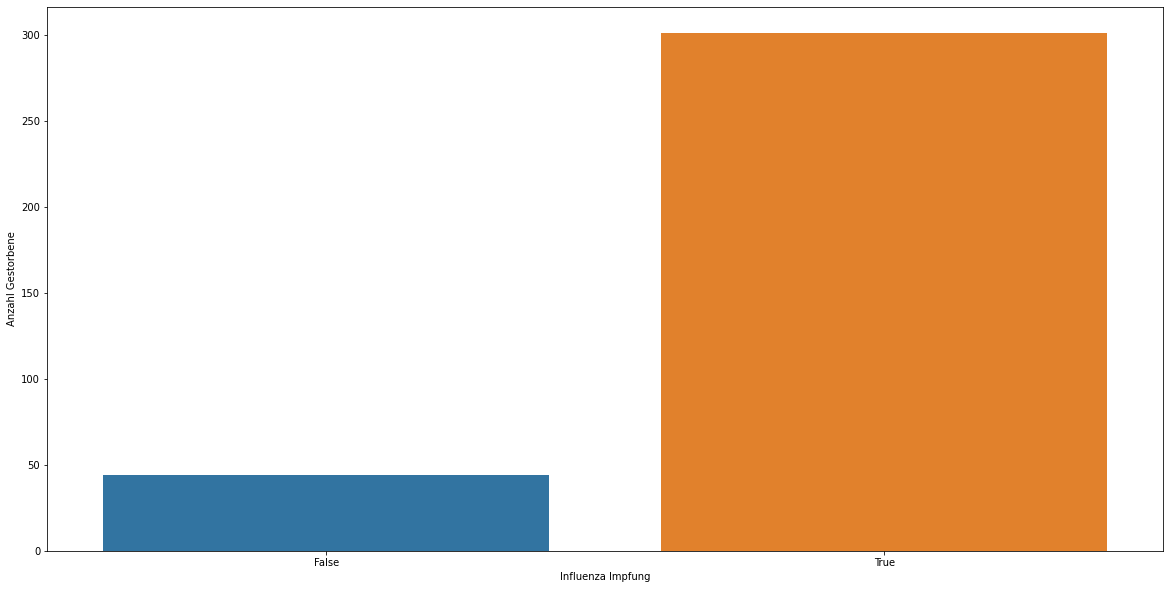

In [12]:
plt.gcf().set_size_inches(20, 10)
countplot_gestorbene = sns.countplot(x="Grippe Impfung", data=geimpfte_patienten_df)
countplot_gestorbene.set_ylabel("Anzahl Gestorbene")
countplot_gestorbene.set_xlabel("Influenza Impfung")

In [13]:
conn.close()